# Residual Plot

Plot the residuals for the out of sample data sets for quiet and storm times.

In [1]:
#plot matplotlib figures in the notebook
%matplotlib inline

#auto reload modules before executing
%load_ext autoreload
%autoreload 2

#print all output in a cell 
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

import os, sys
import pickle

from scipy import stats

#add read_io module to current path ()
file_path = 'D:\\GitHub\\DataIO\\'
sys.path.append(os.path.dirname(file_path))


In [3]:
# import data input/output module
import data_io as dio

In [9]:
def oos_dat(ddir = 'D:/data/SatDensities/',
            dmod = ['SI','FI','FI_GEO']):
    """
    Function to return the out of sample datasets from rf_model( )

    ----------
    
    None
    
    ddir: str
        file directory for data

    Returns
    -------
    os_df : Pandas DataFrame
        DataFrame with the out of sample data for each model.

    """  
    # create empty data frames for returning 
    oos_a = pd.DataFrame( )
    oos_b = pd.DataFrame( )

    # read in the data
    for mod in dmod:
        f = ddir+f'{mod}_RFdat.pkl' 
        
        print(f)
        dat_a, dat_b = pd.read_pickle(f)[4:]
        dat_a = dat_a[['400kmDensity', '400kmDensity_pred', 'DateTime', 
                        'storm','storm phase']]
        dat_a['Model'] = mod
        dat_b = dat_b[['400kmDensity', '400kmDensity_pred', 'DateTime', 
                        'storm','storm phase']]
        dat_b['Model'] = mod
    
        oos_a = pd.concat([oos_a,dat_a])
        oos_b = pd.concat([oos_b,dat_b])

    # calculate residuals
    oos_a['resid'] = oos_a['400kmDensity'] - oos_a['400kmDensity_pred']
    oos_b['resid'] = oos_b['400kmDensity'] - oos_b['400kmDensity_pred']

    # calculate the desnity ratio
    oos_a['ratio'] = oos_a['400kmDensity_pred'] / oos_a['400kmDensity']
    oos_b['ratio'] = oos_b['400kmDensity_pred'] / oos_b['400kmDensity'] 
    
    return oos_a, oos_b


In [10]:
#read in data
oos_ga, oos_ch = oos_dat( ) # grace A and CHAMP out of sample data

#define the data subsets
ga_qt = oos_ga['storm'] < 0 # quiet time data
ga_st = oos_ga['storm'] > 0 # storm time data
ga_si = oos_ga['Model'] == 'SI' # solar model
ga_fi = oos_ga['Model'] == 'FI' # FISM model
ga_fg = oos_ga['Model'] == 'FI_GEO' # FISM/GEO model

ch_qt = oos_ch['storm'] < 0 # quiet time data
ch_st = oos_ch['storm'] > 0 # storm time data
ch_si = oos_ch['Model'] == 'SI' # solar model
ch_fi = oos_ch['Model'] == 'FI' # FISM model
ch_fg = oos_ch['Model'] == 'FI_GEO' # FISM/GEO model

D:/data/SatDensities/SI_RFdat.pkl
D:/data/SatDensities/FI_RFdat.pkl
D:/data/SatDensities/FI_GEO_RFdat.pkl


In [150]:
d_min = oos_ch['DateTime'].min()
d_max = oos_ch['DateTime'].max()

# read omni data and truncate data to similar range as grace data
om_d, om_m = dio.load_omni(res='5m',sdate='2002-01-01', nd=13)

om_d = om_d[['DateTime','AE', 'SYM_H index']]

om_d = om_d[(om_d['DateTime'] >= d_min-pd.DateOffset(minutes=5)) & (om_d['DateTime'] <= d_max+pd.DateOffset(minutes=5))]

In [151]:
# reset so only last call comes out
InteractiveShell.ast_node_interactivity = "last"

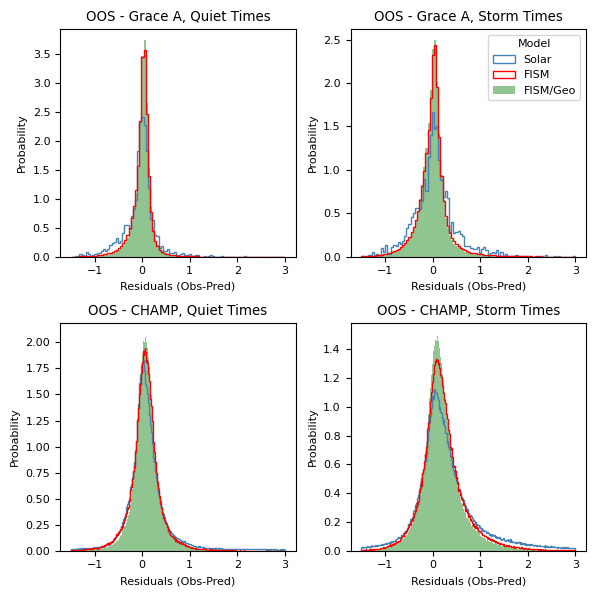

In [152]:
cumulative = False
hmin = -1.5
hmax = 3

hbins_ga = np.histogram_bin_edges(oos_ga.loc[ga_si, 'resid'],bins='fd',range=(hmin,hmax))
hbins_ch = np.histogram_bin_edges(oos_ch.loc[ch_si, 'resid'],bins='fd',range=(hmin,hmax))

density=True

plt.rcParams.update({'font.size': 8})
fig, ax = plt.subplots(2,2, figsize=(6,6))

# Grace A
ax[0,0].hist(oos_ga.loc[ga_qt & ga_si,'resid'],bins=hbins_ga, alpha = 1, label='Solar', density=density, color='steelblue', histtype='step', cumulative=cumulative)
ax[0,0].hist(oos_ga.loc[ga_qt & ga_fi,'resid'],bins=hbins_ga, alpha = 1, label='FISM', density=density, color= 'red', histtype='step', cumulative=cumulative)
ax[0,0].hist(oos_ga.loc[ga_qt & ga_fg,'resid'],bins=hbins_ga, alpha = 0.5, label='FISM/Geo', density=density, color= 'forestgreen', cumulative=cumulative)
ax[0,0].set(title='OOS - Grace A, Quiet Times', xlabel='Residuals (Obs-Pred)', ylabel='Probability')

ax[0,1].hist(oos_ga.loc[ga_st & ga_si,'resid'],bins=hbins_ga, alpha = 1, label='Solar', density=density, color='steelblue', histtype='step', cumulative=cumulative)
ax[0,1].hist(oos_ga.loc[ga_st & ga_fi,'resid'],bins=hbins_ga, alpha = 1, label='FISM', density=density, color= 'red', histtype='step', cumulative=cumulative)
ax[0,1].hist(oos_ga.loc[ga_st & ga_fg,'resid'],bins=hbins_ga, alpha = 0.5, label='FISM/Geo', density=density, color= 'forestgreen', cumulative=cumulative)
ax[0,1].set(title='OOS - Grace A, Storm Times', xlabel='Residuals (Obs-Pred)', ylabel='Probability')

# CHAMP
ax[1,0].hist(oos_ch.loc[ch_qt & ch_si,'resid'],bins=hbins_ch, alpha = 1, label='Solar', density=density, color='steelblue', histtype='step', cumulative=cumulative)
ax[1,0].hist(oos_ch.loc[ch_qt & ch_fi,'resid'],bins=hbins_ch, alpha = 1, label='FISM', density=density, color= 'red', histtype='step', cumulative=cumulative)
ax[1,0].hist(oos_ch.loc[ch_qt & ch_fg,'resid'],bins=hbins_ch, alpha = 0.5, label='FISM/Geo', density=density, color= 'forestgreen', cumulative=cumulative)
ax[1,0].set(title='OOS - CHAMP, Quiet Times', xlabel='Residuals (Obs-Pred)', ylabel='Probability')

ax[1,1].hist(oos_ch.loc[ch_st & ch_si,'resid'],bins=hbins_ch, alpha = 1, label='Solar', density=density, color='steelblue', histtype='step', cumulative=cumulative)
ax[1,1].hist(oos_ch.loc[ch_st & ch_fi,'resid'],bins=hbins_ch, alpha = 1, label='FISM', density=density, color= 'red', histtype='step', cumulative=cumulative)
ax[1,1].hist(oos_ch.loc[ch_st & ch_fg,'resid'],bins=hbins_ch, alpha = 0.5, label='FISM/Geo', density=density, color= 'forestgreen', cumulative=cumulative)
ax[1,1].set(title='OOS - CHAMP, Storm Times', xlabel='Residuals (Obs-Pred)', ylabel='Probability')

ax[0,1].legend(bbox_to_anchor=(1., 1),loc='upper right',fontsize=8)
ax[0,1].get_legend().set_title("Model")

plt.tight_layout()
fig.savefig('C:/Users/krmurph1/OneDrive/SatDrag_RF/Resid_Hist.pdf', dpi=300, format='pdf')

# 2D Storm Metrics

Here we just need a plot of sym-h (AE) and the median residual for that value.

In [153]:
tol = pd.Timedelta('2.5 minute')
om_d = om_d.rename(columns={'DateTime':'DateTime_omni'})
om_d.index = om_d['DateTime_omni']

oos_ch2 = oos_ch.sort_values(by='DateTime')
oos_ch2.index = oos_ch2['DateTime']




In [154]:
oos_db = pd.merge_asof(left=oos_ch2,right=om_d,right_index=True,left_index=True,direction='nearest',tolerance=tol) 

In [155]:
db_qt = oos_db['storm'] < 0 # quiet time data
db_st = oos_db['storm'] > 0 # storm time data
db_si = oos_db['Model'] == 'SI' # solar model
db_fi = oos_db['Model'] == 'FI' # FISM model
db_fg = oos_db['Model'] == 'FI_GEO' # FISM/GEO model

In [156]:
xbins, ybins = 21, 21
smin, smax = -200,10

#xbins = np.histogram_bin_edges(oos_db.loc[db_st & db_si,'SYM_H index'],bins='fd',range=(hmin,hmax))
x_axis = np.arange(-200,10,10)+5
si_stat, x_edge, _ = stats.binned_statistic(oos_db.loc[db_st & db_si,'SYM_H index'],
                                                    values=oos_db.loc[db_st & db_si,'resid'],
                                                    bins=[xbins], range=[smin,smax],
                                                    statistic='median')

fi_stat, x_edge, _ = stats.binned_statistic(oos_db.loc[db_st & db_fi,'SYM_H index'],
                                                    values=oos_db.loc[db_st & db_fi,'resid'],
                                                    bins=[xbins], range=[smin,smax],
                                                    statistic='median')

fg_stat, x_edge, _ = stats.binned_statistic(oos_db.loc[db_st & db_fg,'SYM_H index'],
                                                    values=oos_db.loc[db_st & db_fg,'resid'],
                                                    bins=[xbins], range=[smin,smax],
                                                    statistic='median')

aemin, aemax = 0,2000
xbins=20
ae_axis = np.arange(aemin,aemax,100)+50
sia_stat, x_edge, _ = stats.binned_statistic(oos_db.loc[db_st & db_si,'AE'],
                                                    values=oos_db.loc[db_st & db_si,'resid'],
                                                    bins=[xbins], range=[aemin,aemax],
                                                    statistic='median')

fia_stat, x_edge, _ = stats.binned_statistic(oos_db.loc[db_st & db_fi,'AE'],
                                                    values=oos_db.loc[db_st & db_fi,'resid'],
                                                    bins=[xbins], range=[aemin,aemax],
                                                    statistic='median')

fga_stat, x_edge, _ = stats.binned_statistic(oos_db.loc[db_st & db_fg,'AE'],
                                                    values=oos_db.loc[db_st & db_fg,'resid'],
                                                    bins=[xbins], range=[aemin,aemax],
                                                    statistic='median')


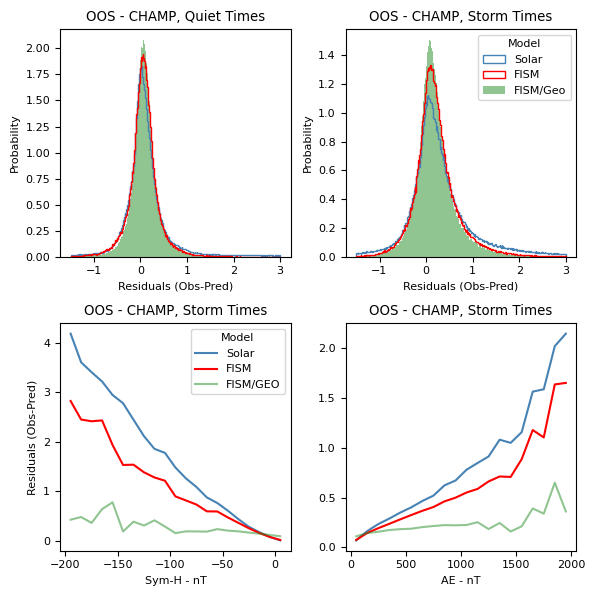

In [157]:
plt.rcParams.update({'font.size': 8})
fig2, ax2 = plt.subplots(2,2, figsize=(6,6))

# CHAMP
ax2[0,0].hist(oos_ch.loc[ch_qt & ch_si,'resid'],bins=hbins_ch, alpha = 1, label='Solar', density=density, color='steelblue', histtype='step', cumulative=cumulative)
ax2[0,0].hist(oos_ch.loc[ch_qt & ch_fi,'resid'],bins=hbins_ch, alpha = 1, label='FISM', density=density, color= 'red', histtype='step', cumulative=cumulative)
ax2[0,0].hist(oos_ch.loc[ch_qt & ch_fg,'resid'],bins=hbins_ch, alpha = 0.5, label='FISM/Geo', density=density, color= 'forestgreen', cumulative=cumulative)
ax2[0,0].set(title='OOS - CHAMP, Quiet Times', xlabel='Residuals (Obs-Pred)', ylabel='Probability')

ax2[0,1].hist(oos_ch.loc[ch_st & ch_si,'resid'],bins=hbins_ch, alpha = 1, label='Solar', density=density, color='steelblue', histtype='step', cumulative=cumulative)
ax2[0,1].hist(oos_ch.loc[ch_st & ch_fi,'resid'],bins=hbins_ch, alpha = 1, label='FISM', density=density, color= 'red', histtype='step', cumulative=cumulative)
ax2[0,1].hist(oos_ch.loc[ch_st & ch_fg,'resid'],bins=hbins_ch, alpha = 0.5, label='FISM/Geo', density=density, color= 'forestgreen', cumulative=cumulative)
ax2[0,1].set(title='OOS - CHAMP, Storm Times', xlabel='Residuals (Obs-Pred)', ylabel='Probability')

ax2[0,1].legend(bbox_to_anchor=(1., 1),loc='upper right',fontsize=8)
ax2[0,1].get_legend().set_title("Model")


# Sym H plot
ax2[1,0].plot(x_axis,si_stat,alpha = 1, label='Solar', color='steelblue')
ax2[1,0].plot(x_axis,fi_stat,alpha = 1, label='FISM', color='red')
ax2[1,0].plot(x_axis,fg_stat,alpha = 0.5, label='FISM/GEO', color='forestgreen')
ax2[1,0].set(title='OOS - CHAMP, Storm Times', ylabel='Residuals (Obs-Pred)', xlabel='Sym-H - nT')


# AE Plot
ax2[1,1].plot(ae_axis,sia_stat,alpha = 1, label='Solar', color='steelblue')
ax2[1,1].plot(ae_axis,fia_stat,alpha = 1, label='FISM', color='red')
ax2[1,1].plot(ae_axis,fga_stat,alpha = 0.5, label='FISM/GEO', color='forestgreen')
ax2[1,1].set(title='OOS - CHAMP, Storm Times', xlabel='AE - nT')

ax2[1,0].legend(bbox_to_anchor=(1., 1),loc='upper right',fontsize=8)
ax2[1,0].get_legend().set_title("Model")

plt.tight_layout()
fig2.savefig('C:/Users/krmurph1/OneDrive/SatDrag_RF/Resid_Func.pdf', dpi=300, format='pdf')

# Boxed Stats Plot

In [171]:
def box_binned_stats(x, 
                     values,
                     bins=10, 
                     range=None,
                     whis=1.5):
    
    mean, x_edge, _ = stats.binned_statistic(x, values, bins=bins, range=range, statistic=np.nanmean)
    median, _, _ = stats.binned_statistic(x, values, bins=bins, range=range, statistic=np.nanmedian)

    # define lambdas for the upper and lower quartiles
    lq_nan = lambda stat: np.nanpercentile(stat, 25)
    uq_nan = lambda stat: np.nanpercentile(stat, 75)

    low_q, _, _ = stats.binned_statistic(x, values, bins=bins, range=range, statistic=lq_nan)
    up_q, _, _ = stats.binned_statistic(x, values, bins=bins, range=range, statistic=uq_nan)
    
    x_cen = (x_edge[0:-1]+[x_edge[1:]])/2.
    x_cen = x_cen.squeeze()
    x_wid = x_edge[1]-x_edge[0]

    box_stats = [ ] # empty to list to return the values for box plot
    for mn, md, lq, uq, in zip(mean, median, low_q, up_q):
        val = {
            "mean":  mn,  # not required
            "med": md,
            "q1": lq,
            "q3": uq,
            "whislo": lq - whis*(uq-lq),  # required
            "whishi": uq + whis*(uq-lq),  # required
            "fliers": []  # required if showfliers=True
            }
        box_stats.append(val)
    
    return box_stats, x_edge, x_cen, x_wid

In [207]:
oos_db.head()

,400kmDensity,400kmDensity_pred,DateTime,storm,storm phase,Model,resid,ratio,DateTime_omni,AE,SYM_H index
DateTime,,,,,,,,,,,
2002-01-01 00:00:00,6.156611,6.809751,2002-01-01 00:00:00,-1,-1,SI,-0.653140,1.106088,2002-01-01 00:00:00,106.0,-38.0
2002-01-01 00:05:00,6.118733,4.508391,2002-01-01 00:05:00,-1,-1,SI,1.610342,0.736818,2002-01-01 00:05:00,108.0,-38.0
2002-01-01 00:10:00,6.063755,4.508584,2002-01-01 00:10:00,-1,-1,SI,1.555171,0.743530,2002-01-01 00:10:00,97.0,-38.0
2002-01-01 00:15:00,7.384556,4.510848,2002-01-01 00:15:00,-1,-1,SI,2.873708,0.610849,2002-01-01 00:15:00,101.0,-39.0
2002-01-01 00:20:00,7.954827,4.560413,2002-01-01 00:20:00,-1,-1,SI,3.394414,0.573289,2002-01-01 00:20:00,103.0,-39.0


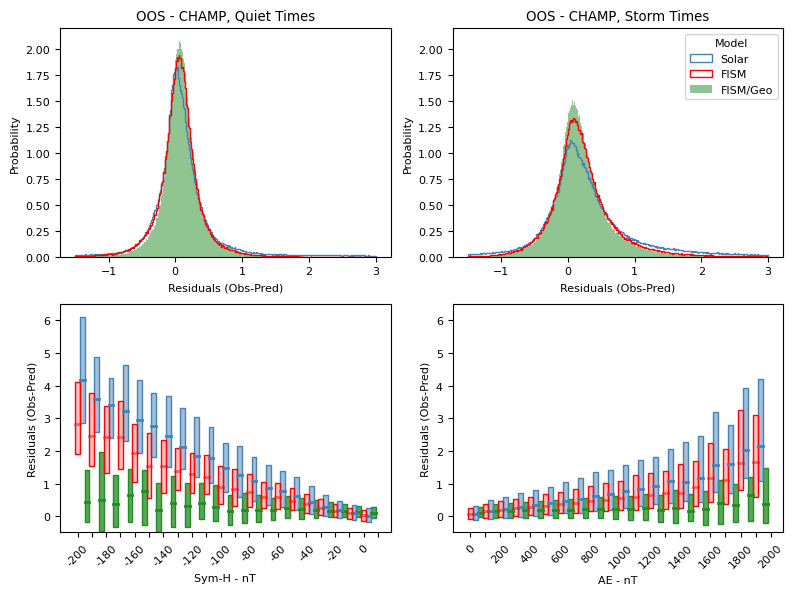

In [224]:
plt.rcParams.update({'font.size': 8})
fig3, ax3 = plt.subplots(2,2, figsize=(8,6))

# CHAMP
ax3[0,0].hist(oos_ch.loc[ch_qt & ch_si,'resid'],bins=hbins_ch, alpha = 1, label='Solar', density=density, color='steelblue', histtype='step', cumulative=cumulative)
ax3[0,0].hist(oos_ch.loc[ch_qt & ch_fi,'resid'],bins=hbins_ch, alpha = 1, label='FISM', density=density, color= 'red', histtype='step', cumulative=cumulative)
ax3[0,0].hist(oos_ch.loc[ch_qt & ch_fg,'resid'],bins=hbins_ch, alpha = 0.5, label='FISM/Geo', density=density, color= 'forestgreen', cumulative=cumulative)
ax3[0,0].set(title='OOS - CHAMP, Quiet Times', xlabel='Residuals (Obs-Pred)', ylabel='Probability')

ax3[0,1].hist(oos_ch.loc[ch_st & ch_si,'resid'],bins=hbins_ch, alpha = 1, label='Solar', density=density, color='steelblue', histtype='step', cumulative=cumulative)
ax3[0,1].hist(oos_ch.loc[ch_st & ch_fi,'resid'],bins=hbins_ch, alpha = 1, label='FISM', density=density, color= 'red', histtype='step', cumulative=cumulative)
ax3[0,1].hist(oos_ch.loc[ch_st & ch_fg,'resid'],bins=hbins_ch, alpha = 0.5, label='FISM/Geo', density=density, color= 'forestgreen', cumulative=cumulative)
ax3[0,1].set(title='OOS - CHAMP, Storm Times', xlabel='Residuals (Obs-Pred)', ylabel='Probability')

ax3[0,1].legend(bbox_to_anchor=(1., 1),loc='upper right',fontsize=8)
ax3[0,1].get_legend().set_title("Model")


# Sym H plot
smin, smax = -200,10
xbins = 21

a,b, c, d = box_binned_stats(oos_db.loc[db_st & db_fg,'SYM_H index'],
                    values=oos_db.loc[db_st & db_fg,'resid'],
                    bins=[xbins], range=[smin,smax], whis=0)

b1 = ax3[1,0].bxp(a, positions=c-d/2.+d*2/3., widths=d/3., patch_artist=True, showmeans=showmean, shownotches=False, showcaps=False)
color = 'forestgreen'
for patch, l_md in zip(b1['boxes'], b1['medians']):
    # change patch color
    patch.set_facecolor([0.13333333333333333, 0.5450980392156862, 0.13333333333333333,0.75])
    patch.set_edgecolor([0.13333333333333333, 0.5450980392156862, 0.13333333333333333,1.0])
    # change median and mean color
    l_md.set_color(color)
    l_md.set_linewidth(2)
    l_md.set_linestyle('solid')
    l_mn.set_markerfacecolor(color)
    l_mn.set_markeredgecolor(color)

a,b, c, d = box_binned_stats(oos_db.loc[db_st & db_si,'SYM_H index'],
                    values=oos_db.loc[db_st & db_si,'resid'],
                    bins=[xbins], range=[smin,smax], whis=0)

b2 = ax3[1,0].bxp(a, positions=c-d/2.+d/3., widths=d/3., patch_artist=True, showmeans=showmean, shownotches=False, showcaps=False) 
color = 'steelblue'
for patch, l_md in zip(b2['boxes'], b2['medians']):
    # change patch color
    patch.set_facecolor([0.27450980392156865, 0.5098039215686274, 0.7058823529411765, 0.5])
    patch.set_edgecolor([0.27450980392156865, 0.5098039215686274, 0.7058823529411765, 1.0])
    # patch.set_linestyle('None')
    # change median and mean color
    l_md.set_color(color)
    l_md.set_linewidth(2)
    l_md.set_linestyle('solid')
    l_mn.set_markerfacecolor(color)
    l_mn.set_markeredgecolor(color)

a,b, c, d = box_binned_stats(oos_db.loc[db_st & db_fi,'SYM_H index'],
                    values=oos_db.loc[db_st & db_fi,'resid'],
                    bins=[xbins], range=[smin,smax], whis=0)

b3 = ax3[1,0].bxp(a, positions=c-d/2., widths=d/3., patch_artist=True, showmeans=showmean, shownotches=False, showcaps=False) 
color = (1,0,0,0.5)
for patch, l_md in zip(b3['boxes'], b3['medians']):
    # change patch color
    patch.set_facecolor([1,0,0,0.25])
    patch.set_edgecolor([1,0,0,1])
    #patch.set_alpha(0.25)
    # change median and mean color
    l_md.set_color(color)
    l_md.set_linewidth(2)
    l_md.set_linestyle('solid')
    l_mn.set_markerfacecolor(color)
    l_mn.set_markeredgecolor(color)

xt = b
xl = b.astype(int).astype(str)
xl[1::2]= ' '
ax3[1,0].set_xticks(xt,xl,rotation=45)
ax3[1,0].set_xlabel('Sym-H - nT')
ax3[1,0].set_ylabel('Residuals (Obs-Pred)')

# AE Plot
aemin, aemax = 0,2000
xbins=20
a,b, c, d = box_binned_stats(oos_db.loc[db_st & db_fg,'AE'],
                    values=oos_db.loc[db_st & db_fg,'resid'],
                    bins=[xbins], range=[aemin,aemax], whis=0)

b1 = ax3[1,1].bxp(a, positions=c-d/2.+d*2/3., widths=d/3., patch_artist=True, showmeans=showmean, shownotches=False, showcaps=False)
color = 'forestgreen'
for patch, l_md in zip(b1['boxes'], b1['medians']):
    # change patch color
    patch.set_facecolor([0.13333333333333333, 0.5450980392156862, 0.13333333333333333,0.75])
    patch.set_edgecolor([0.13333333333333333, 0.5450980392156862, 0.13333333333333333,1.0])
    # change median and mean color
    l_md.set_color(color)
    l_md.set_linewidth(2)
    l_md.set_linestyle('solid')
    l_mn.set_markerfacecolor(color)
    l_mn.set_markeredgecolor(color)

a,b, c, d = box_binned_stats(oos_db.loc[db_st & db_si,'AE'],
                    values=oos_db.loc[db_st & db_si,'resid'],
                    bins=[xbins], range=[aemin,aemax], whis=0)

b2 = ax3[1,1].bxp(a, positions=c-d/2.+d/3., widths=d/3., patch_artist=True, showmeans=showmean, shownotches=False, showcaps=False) 
color = 'steelblue'
for patch, l_md in zip(b2['boxes'], b2['medians']):
    # change patch color
    patch.set_facecolor([0.27450980392156865, 0.5098039215686274, 0.7058823529411765, 0.5])
    patch.set_edgecolor([0.27450980392156865, 0.5098039215686274, 0.7058823529411765, 1.0])
    # patch.set_linestyle('None')
    # change median and mean color
    l_md.set_color(color)
    l_md.set_linewidth(2)
    l_md.set_linestyle('solid')
    l_mn.set_markerfacecolor(color)
    l_mn.set_markeredgecolor(color)

a,b, c, d = box_binned_stats(oos_db.loc[db_st & db_fi,'AE'],
                    values=oos_db.loc[db_st & db_fi,'resid'],
                    bins=[xbins], range=[aemin,aemax], whis=0)

b3 = ax3[1,1].bxp(a, positions=c-d/2., widths=d/3., patch_artist=True, showmeans=showmean, shownotches=False, showcaps=False) 
color = (1,0,0,0.5)
for patch, l_md in zip(b3['boxes'], b3['medians']):
    # change patch color
    patch.set_facecolor([1,0,0,0.25])
    patch.set_edgecolor([1,0,0,1])
    #patch.set_alpha(0.25)
    # change median and mean color
    l_md.set_color(color)
    l_md.set_linewidth(2)
    l_md.set_linestyle('solid')
    l_mn.set_markerfacecolor(color)
    l_mn.set_markeredgecolor(color)

ax3[1,1].set_xticks([])
xt = b
xl = b.astype(int).astype(str)
xl[1::2]= ' '
ax3[1,1].set_xticks(xt,xl,rotation=45)
ax3[1,1].set_xlabel('AE - nT')
ax3[1,1].set_ylabel('Residuals (Obs-Pred)')

ax3[0,0].set_ylim(0,2.2)
ax3[0,1].set_ylim(0,2.2)
ax3[1,0].set_ylim(-0.5,6.5)
ax3[1,1].set_ylim(-0.5,6.5)




plt.tight_layout()
fig3.savefig('C:/Users/krmurph1/OneDrive/SatDrag_RF/Resid_Func_box.pdf', dpi=300, format='pdf')

In [212]:
b[::2]

array([   0.,  200.,  400.,  600.,  800., 1000., 1200., 1400., 1600.,
       1800., 2000.])

# Average Metrics

In [161]:
def metric_msa(dat):
    '''
    Calculate Median Symmetric Accuracy 

    '''  
    return np.exp(np.mean((np.log(1/dat))))


def metric_sspb(dat):
    ''' 
    Calculate Symmetric Signed Percentage Bias
    '''

    mdlq = np.median(np.log(dat))
    sspb = 100*np.sign(mdlq)*(np.exp(np.abs(mdlq))-1)

    return sspb

In [162]:
ch_oc_al_fg = metric_msa(oos_ch.loc[ch_fg,'ratio'])
ch_oc_qt_fg = metric_msa(oos_ch.loc[ch_qt & ch_fg,'ratio'])
ch_oc_st_fg = metric_msa(oos_ch.loc[ch_st & ch_fg,'ratio'])

ch_oc_al_fi = metric_msa(oos_ch.loc[ch_fi,'ratio'])
ch_oc_qt_fi = metric_msa(oos_ch.loc[ch_qt & ch_fi,'ratio'])
ch_oc_st_fi = metric_msa(oos_ch.loc[ch_st & ch_fi,'ratio'])

ch_oc_al_si = metric_msa(oos_ch.loc[ch_si,'ratio'])
ch_oc_qt_si = metric_msa(oos_ch.loc[ch_qt & ch_si,'ratio'])
ch_oc_st_si = metric_msa(oos_ch.loc[ch_st & ch_si,'ratio'])


print(ch_oc_al_fg, ch_oc_qt_fg, ch_oc_st_fg)
print(ch_oc_al_fi, ch_oc_qt_fi, ch_oc_st_fi)
print(ch_oc_al_si, ch_oc_qt_si, ch_oc_st_si)



1.1184082021873454 1.1065551045672604 1.1278299583305995
1.1103845663280447 1.0619229876968888 1.1500917498097756
1.1043960473758256 1.0453838683303869 1.1505007044531486


In [163]:
ch_ss_al_fg = metric_sspb(oos_ch.loc[ch_fg,'ratio'])
ch_ss_qt_fg = metric_sspb(oos_ch.loc[ch_qt & ch_fg,'ratio'])
ch_ss_st_fg = metric_sspb(oos_ch.loc[ch_st & ch_fg,'ratio'])

ch_ss_al_fi = metric_sspb(oos_ch.loc[ch_fi,'ratio'])
ch_ss_qt_fi = metric_sspb(oos_ch.loc[ch_qt & ch_fi,'ratio'])
ch_ss_st_fi = metric_sspb(oos_ch.loc[ch_st & ch_fi,'ratio'])

ch_ss_al_si = metric_sspb(oos_ch.loc[ch_si,'ratio'])
ch_ss_qt_si = metric_sspb(oos_ch.loc[ch_qt & ch_si,'ratio'])
ch_ss_st_si = metric_sspb(oos_ch.loc[ch_st & ch_si,'ratio'])

print(ch_ss_al_fg, ch_ss_qt_fg, ch_ss_st_fg)
print(ch_ss_al_fi, ch_ss_qt_fi, ch_ss_st_fi)
print(ch_ss_al_si, ch_ss_qt_si, ch_ss_st_si)



-13.913091050920446 -13.598833425392431 -14.115817645105233
-13.031000524253455 -9.518182609374847 -15.468188184249865
-12.644030629977054 -7.879564354718571 -16.159095238294242


In [164]:

print(metric_msa(oos_ch.loc[ch_fg,['DateTime','400kmDensity_pred']].rolling('90min',on='DateTime').mean()['400kmDensity_pred'] / oos_ch.loc[ch_fg,['DateTime','400kmDensity']].rolling('90min',on='DateTime').mean()['400kmDensity']))
print(metric_msa(oos_ch.loc[ch_fi,['DateTime','400kmDensity_pred']].rolling('90min',on='DateTime').mean()['400kmDensity_pred'] / oos_ch.loc[ch_fi,['DateTime','400kmDensity']].rolling('90min',on='DateTime').mean()['400kmDensity']))
print(metric_msa(oos_ch.loc[ch_si,['DateTime','400kmDensity_pred']].rolling('90min',on='DateTime').mean()['400kmDensity_pred'] / oos_ch.loc[ch_si,['DateTime','400kmDensity']].rolling('90min',on='DateTime').mean()['400kmDensity']))


1.1442156773379721
1.1359679806179415
1.1394725808871797


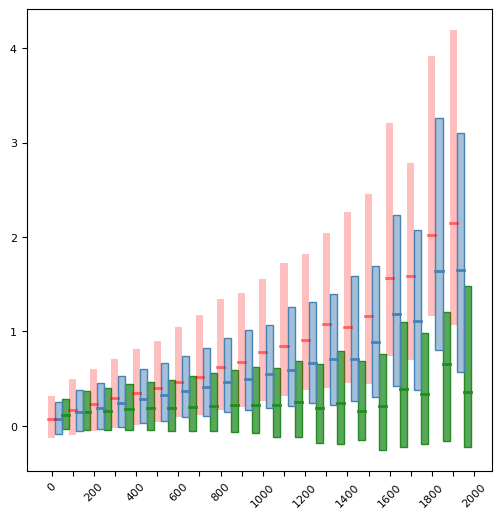

In [215]:
showmean=False

a,b, c, d = box_binned_stats(oos_db.loc[db_st & db_fg,'AE'],
                    values=oos_db.loc[db_st & db_fg,'resid'],
                    bins=[xbins], range=[aemin,aemax], whis=0)

fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(6, 6), sharey=True)
b1 = axes.bxp(a, positions=c-d/2.+d*2/3., widths=d/3., patch_artist=True, showmeans=showmean, shownotches=False, showcaps=False)


color = 'forestgreen'
for patch, l_md in zip(b1['boxes'], b1['medians']):
    # change patch color
    patch.set_facecolor([0.13333333333333333, 0.5450980392156862, 0.13333333333333333,0.75])
    patch.set_edgecolor([0.13333333333333333, 0.5450980392156862, 0.13333333333333333,1.0])
    # change median and mean color
    l_md.set_color(color)
    l_md.set_linewidth(2)
    l_md.set_linestyle('solid')
    l_mn.set_markerfacecolor(color)
    l_mn.set_markeredgecolor(color)

a,b, c, d = box_binned_stats(oos_db.loc[db_st & db_fi,'AE'],
                    values=oos_db.loc[db_st & db_fi,'resid'],
                    bins=[xbins], range=[aemin,aemax], whis=0)

b2 = axes.bxp(a, positions=c-d/2.+d/3., widths=d/3., patch_artist=True, showmeans=showmean, shownotches=False, showcaps=False) 
color = 'steelblue'
for patch, l_md in zip(b2['boxes'], b2['medians']):
    # change patch color
    patch.set_facecolor([0.27450980392156865, 0.5098039215686274, 0.7058823529411765, 0.5])
    patch.set_edgecolor([0.27450980392156865, 0.5098039215686274, 0.7058823529411765, 1.0])
    # patch.set_linestyle('None')
    # change median and mean color
    l_md.set_color(color)
    l_md.set_linewidth(2)
    l_md.set_linestyle('solid')
    l_mn.set_markerfacecolor(color)
    l_mn.set_markeredgecolor(color)

a,b, c, d = box_binned_stats(oos_db.loc[db_st & db_si,'AE'],
                    values=oos_db.loc[db_st & db_si,'resid'],
                    bins=[xbins], range=[aemin,aemax], whis=0)

b3 = axes.bxp(a, positions=c-d/2., widths=d/3., patch_artist=True, showmeans=showmean, shownotches=False, showcaps=False) 
color = (1,0,0,0.5)
for patch, l_md in zip(b3['boxes'], b3['medians']):
    # change patch color
    patch.set_facecolor([1,0,0,0.25])
    patch.set_edgecolor([1,0,0,1])
    patch.set_linestyle('None')
    #patch.set_alpha(0.25)
    # change median and mean color
    l_md.set_color(color)
    l_md.set_linewidth(2)
    l_md.set_linestyle('solid')
    l_mn.set_markerfacecolor(color)
    l_mn.set_markeredgecolor(color)

axes.set_xticks([])
xt = b
xl = b.astype(int).astype(str)
xl[1::2]= ' '
axes.set_xticks(xt,xl,rotation=45)


In [199]:
b

array([   0.,  100.,  200.,  300.,  400.,  500.,  600.,  700.,  800.,
        900., 1000., 1100., 1200., 1300., 1400., 1500., 1600., 1700.,
       1800., 1900., 2000.])

In [185]:
import matplotlib.colors as colors

colors.to_rgba('forestgreen')

(0.13333333333333333, 0.5450980392156862, 0.13333333333333333, 1.0)

In [ ]:
b2['medians'][0].set_color('green')
b2['means'][0].set_marker